# THE SPARKS FOUNDATION TASK -1 
 ##AUTHOR : SAMPATH SRINIVASAN

In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

Hours     0
Scores    0
dtype: int64


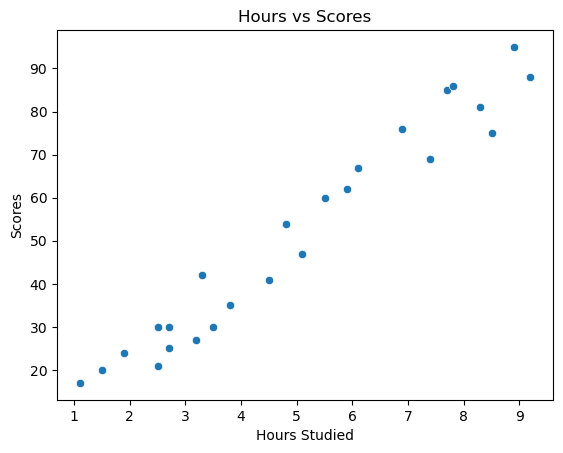

In [16]:
# Checking for Null values
print(data.isnull().sum())

# Making a list of columns
columns = data.columns.tolist()

# Visualizing Data
sns.scatterplot(x='Hours', y='Scores', data=data)
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()


In [6]:
# Split the data into training and testing sets
X = data['Hours'].values.reshape(-1, 1)
y = data['Scores'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
lr = LinearRegression()
lr



LinearRegression()

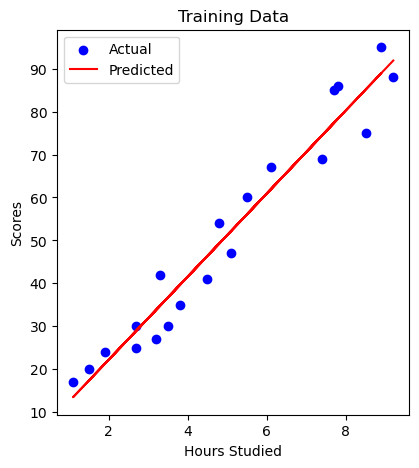

In [44]:
# Visualize Training Data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # Create a subplot for training data
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, model.predict(X_train), color='red', label='Predicted')
plt.title('Training Data')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.legend()

In [45]:
# Make predictions
y_pred = model.predict(X_test)

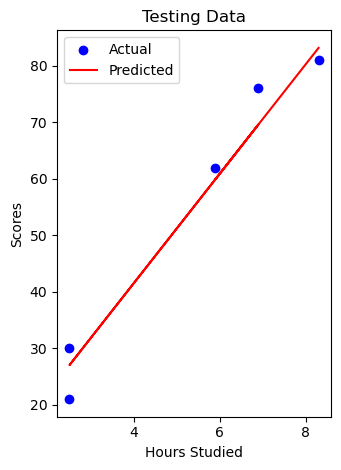

In [27]:
# Visualize Testing Data
plt.subplot(1, 2, 2)  # Create a subplot for testing data
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Testing Data')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.legend()

plt.tight_layout()
plt.show()

In [46]:
#making a data frame
df_predict = pd.DataFrame({"Hours": X_test.reshape(1,-1)[0] , "Actual Score" : y_test.reshape(1,-1)[0] , "Predicted Score" : y_pred.reshape(1,-1)[0]})
df_predict


,Hours,Actual Score,Predicted Score
0,8.3,81,83.188141
1,2.5,30,27.032088
2,2.5,21,27.032088
3,6.9,76,69.633232
4,5.9,62,59.951153


In [47]:
#Visualising the accuracy of the model
df_sorted = df_predict.sort_values(by = "Hours")
df_sorted

,Hours,Actual Score,Predicted Score
1,2.5,30,27.032088
2,2.5,21,27.032088
4,5.9,62,59.951153
3,6.9,76,69.633232
0,8.3,81,83.188141


C:\Users\tkrsa\AppData\Local\Temp\ipykernel_7676\1582711396.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df_sorted["Actual Score"], hist = False , color = "red" , label = "Actual Score")
C:\Users\tkrsa\AppData\Local\Temp\ipykernel_7676\1582711396.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

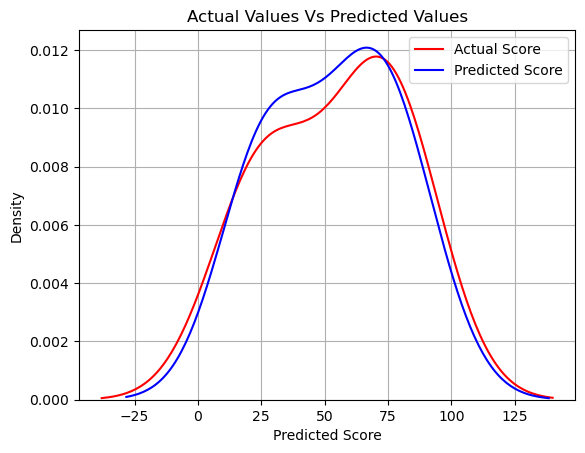

In [59]:
title = "Actual Values Vs Predicted Values"
ax1 = sns.distplot(df_sorted["Actual Score"], hist = False , color = "red" , label = "Actual Score")
sns.distplot(df_sorted["Predicted Score"] , hist = False , color = "blue" , label = "Predicted Score" , ax = ax1)
plt.legend()
plt.grid()
plt.title(title)
plt.show()

In [49]:
# Calculate the model's performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [50]:
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Root Mean Squared Error: 4.352380006653288
R-squared: 0.9678055545167994


In [20]:
# Predict the score for a student studying 9.25 hours per day
hours = np.array([[9.25]])
predicted_score = model.predict(hours)


In [42]:
print(f'Predicted Score for 9.25 hours/day: {predicted_score[0]}')


Predicted Score for 9.25 hours/day: 92.38611528261494
